# Machine Learning - 03 Decision Tree

- data : Hitters.csv[야구선수 급여]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics

%matplotlib inline

In [5]:
Hitters = pd.read_csv("C:/Users/1-11/Jupyter/scikit_learn_data/01_hitters/Hitters.csv")
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 53.0+ KB


In [6]:
Hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


### 데이터 처리
 - salary의 값이 없는 observation 제거
 - Unnamed : 0 컬럼이름 변경 & 제거
 - 결과 변수 salary의 log변환

In [7]:
Hitters.dropna(inplace=True)
Hitters.shape
# ---> 관찰 데이터 수 적어짐

(263, 21)

In [11]:
Hitters.rename(columns = {'Unnamed: 0' : 'Name'}, inplace = True)
Hitters.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [12]:
Hitters['Name'] = Hitters['Name'].apply(lambda x: x[1:])
# 다른 방법 : Hitters['Name'].map(lambda x: x.replace('-',""))

In [13]:
Hitters.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


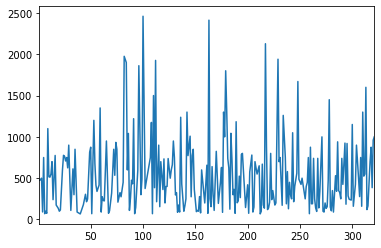

In [15]:
Hitters['Salary'].plot()

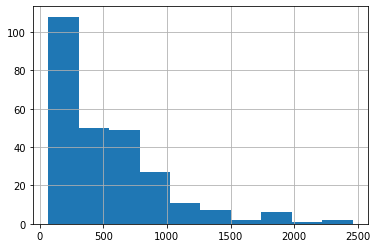

In [16]:
Hitters['Salary'].hist()

In [17]:
# log 변경
Hitters['Salary'] = np.log(Hitters.Salary)

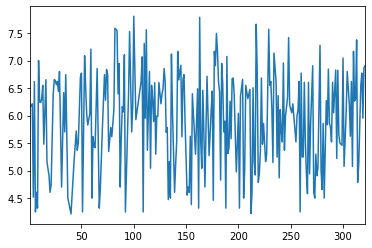

In [19]:
Hitters['Salary'].plot()

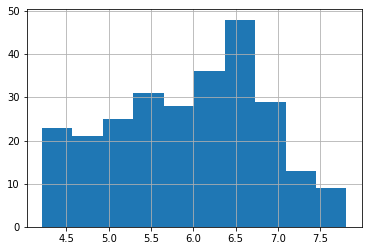

In [18]:
Hitters['Salary'].hist()

In [20]:
# reindex
Hitters.reset_index(drop=True)
Hitters.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,6.163315,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,6.173786,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,6.214608,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,4.516339,N
5,Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,6.620073,A


In [21]:
X = Hitters.loc[ : , ['Years','Hits']]
y = Hitters.Salary

reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3)
reg_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

* 원래 pydotplus를 이용해서 보여주는데, 지금 해당 패키지가 유지보수중이라서 다른 형식으로 처리함.

Text(13, 180, 'R3')

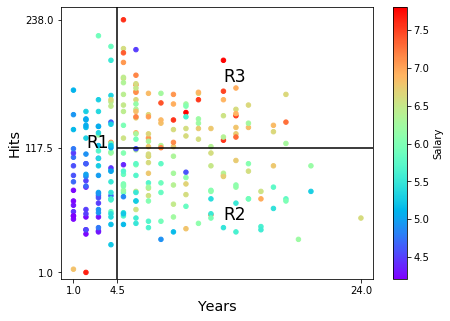

In [24]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))          

Hitters.plot('Years','Hits', kind='scatter',c = 'Salary',
             ax=ax1, xticks=[1, 4.5, 24], yticks=[1, 117.5, 238], 
             xlim=[0, 25], ylim=[-5, 250], cmap='rainbow') 

plt.xlabel('Years', fontsize='x-large')
plt.ylabel('Hits', fontsize='x-large')
plt.vlines(4.5,  ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize=17)
plt.annotate('R2', xy=(13,50), fontsize=17)
plt.annotate('R3', xy=(13,180), fontsize=17)

In [22]:
reg_tree.tree_.threshold

array([  4.5,  -2. , 117.5,  -2. ,  -2. ])

In [23]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

C:\Users\1-11\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


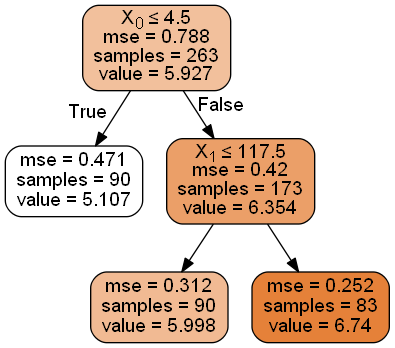

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

- samples : 해당 노드에 속한 sample들의 개수
- value : 해당 노드에 속한 sample들의 mean response
- mse : sample들의 실제 response와 'value'간의 Mean Square Error

- Full 로 한 번 던져보기!

In [26]:
# HItters 데이터 중에 qualitative 변수가 있으므로 이를 dumpy encoding & 'Name' column을 제거
Hitters_enc = pd.get_dummies(Hitters.drop('Name', axis=1),drop_first=True)

# 모든 observation 활용
X = Hitters_enc.drop('Salary', axis=1)
y = Hitters_enc.Salary

# 최대 12단계로
reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=12)
reg_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=12, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [27]:
Hitters_enc.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,0,1,0


In [28]:
reg_tree.tree_.threshold

array([ 1.4520e+03,  1.8200e+02,  1.1750e+02,  6.0000e+00,  4.6500e+02,
       -2.0000e+00,  1.3200e+02,  9.9600e+02,  2.7300e+02,  2.8825e+03,
        6.0500e+01, -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00,
        2.1000e+01, -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00,
       -2.0000e+00, -2.0000e+00, -2.0000e+00])

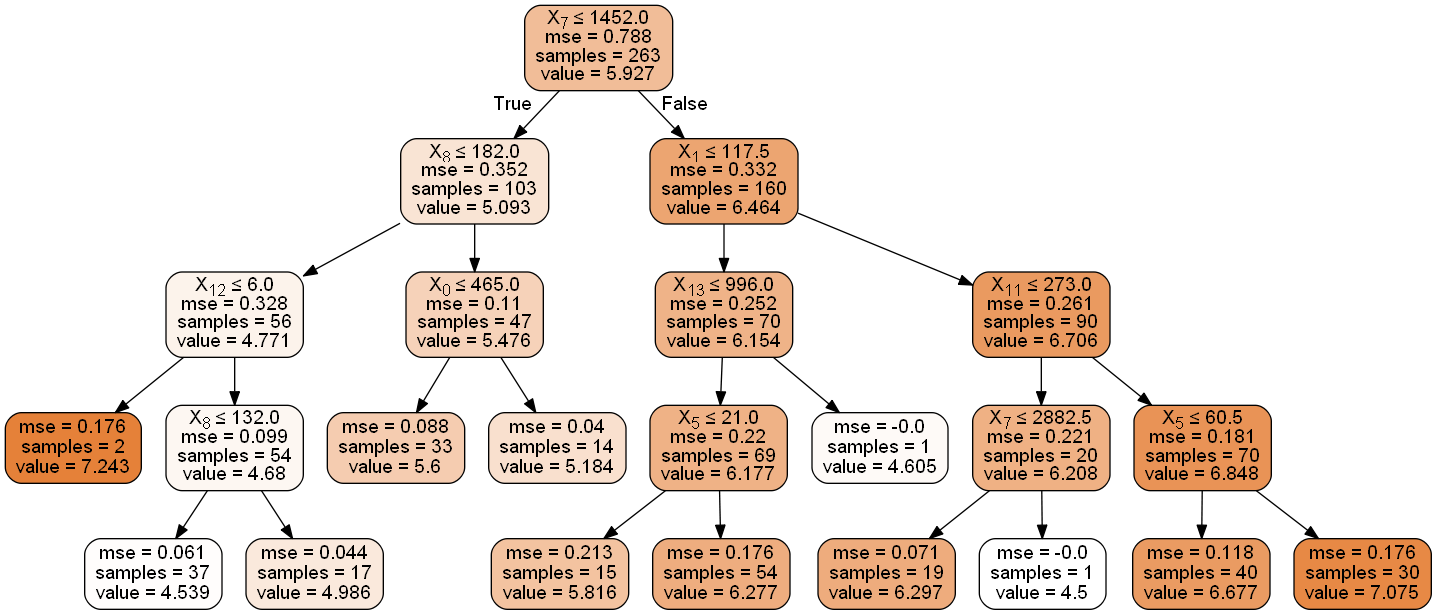

In [29]:
dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
from sklearn.model_selection import cross_val_score

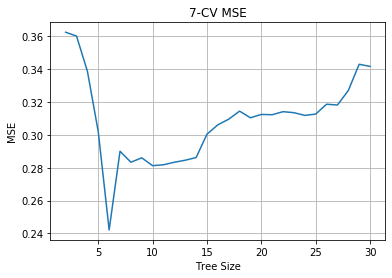

In [35]:
tree_sizes = range(2,31)
MSE_scores = []

for size in tree_sizes:
    reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s = -cross_val_score(reg_tree, X, y, cv=7, scoring='neg_mean_squared_error')
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

- 가장 베스트의 결과는 6개일 때

In [36]:
reg_tree_best = tree.DecisionTreeRegressor(max_leaf_nodes=6, random_state=1234)
reg_tree_best.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=6, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

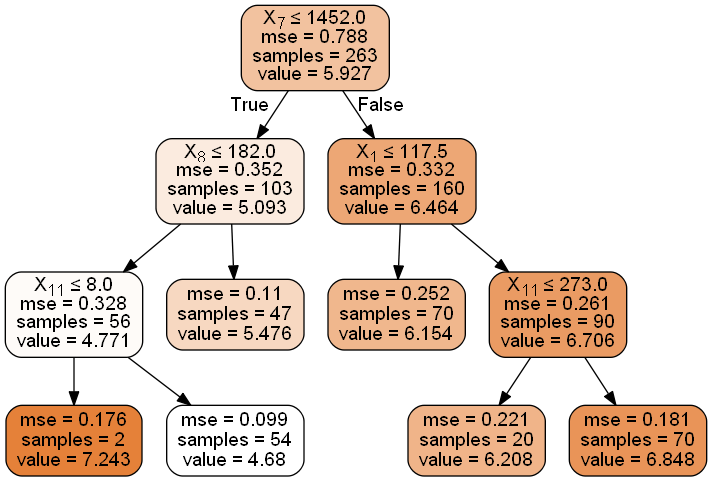

In [37]:
dot_data = StringIO()

export_graphviz(reg_tree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [38]:
# 위의 그림으론 필요한 정보가 안보이기 때문에
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':reg_tree_best.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,CAtBat,0.729415
11,CRBI,0.117926
8,CHits,0.078575
1,Hits,0.074083
0,AtBat,0.000000
17,Division_W,0.000000
16,League_N,0.000000
15,Errors,0.000000
14,Assists,0.000000
13,PutOuts,0.000000


## 테스트 : Carseats

In [53]:
Carseats = pd.read_csv("C:/Users/1-11/Jupyter/scikit_learn_data/02_carseats/Carseats.csv")
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [54]:
Carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


- Unnamed: 0 컬럼은 인덱스번호이므로 불필요 - 제거

In [55]:
del Carseats['Unnamed: 0']
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Step 1
    * Sales의 값이 8이하 0, 8초과 1로 설정
    * Urban에서 N0 -> 0, YES -> 1
    * US에서 N0 -> 0, YES -> 1
    * 15개의 잎

In [56]:
Carseats['High'] = Carseats['Sales'].apply(lambda x: 0 if x<=8 else 1)
Carseats['Urban'] = Carseats['Urban'].apply(lambda x: 0 if x=='No' else 1)
Carseats['US'] = Carseats['US'].apply(lambda x: 0 if x=='No' else 1)

Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,1,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1,0
4,4.15,141,64,3,340,128,Bad,38,13,1,0,0


In [57]:
Carseats['ShelveLoc'] = pd.factorize(Carseats['ShelveLoc'])[0]
Carseats['ShelveLoc']

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [58]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [59]:
X = Carseats.drop(['Sales','High'], axis=1)
y = Carseats['High']

clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

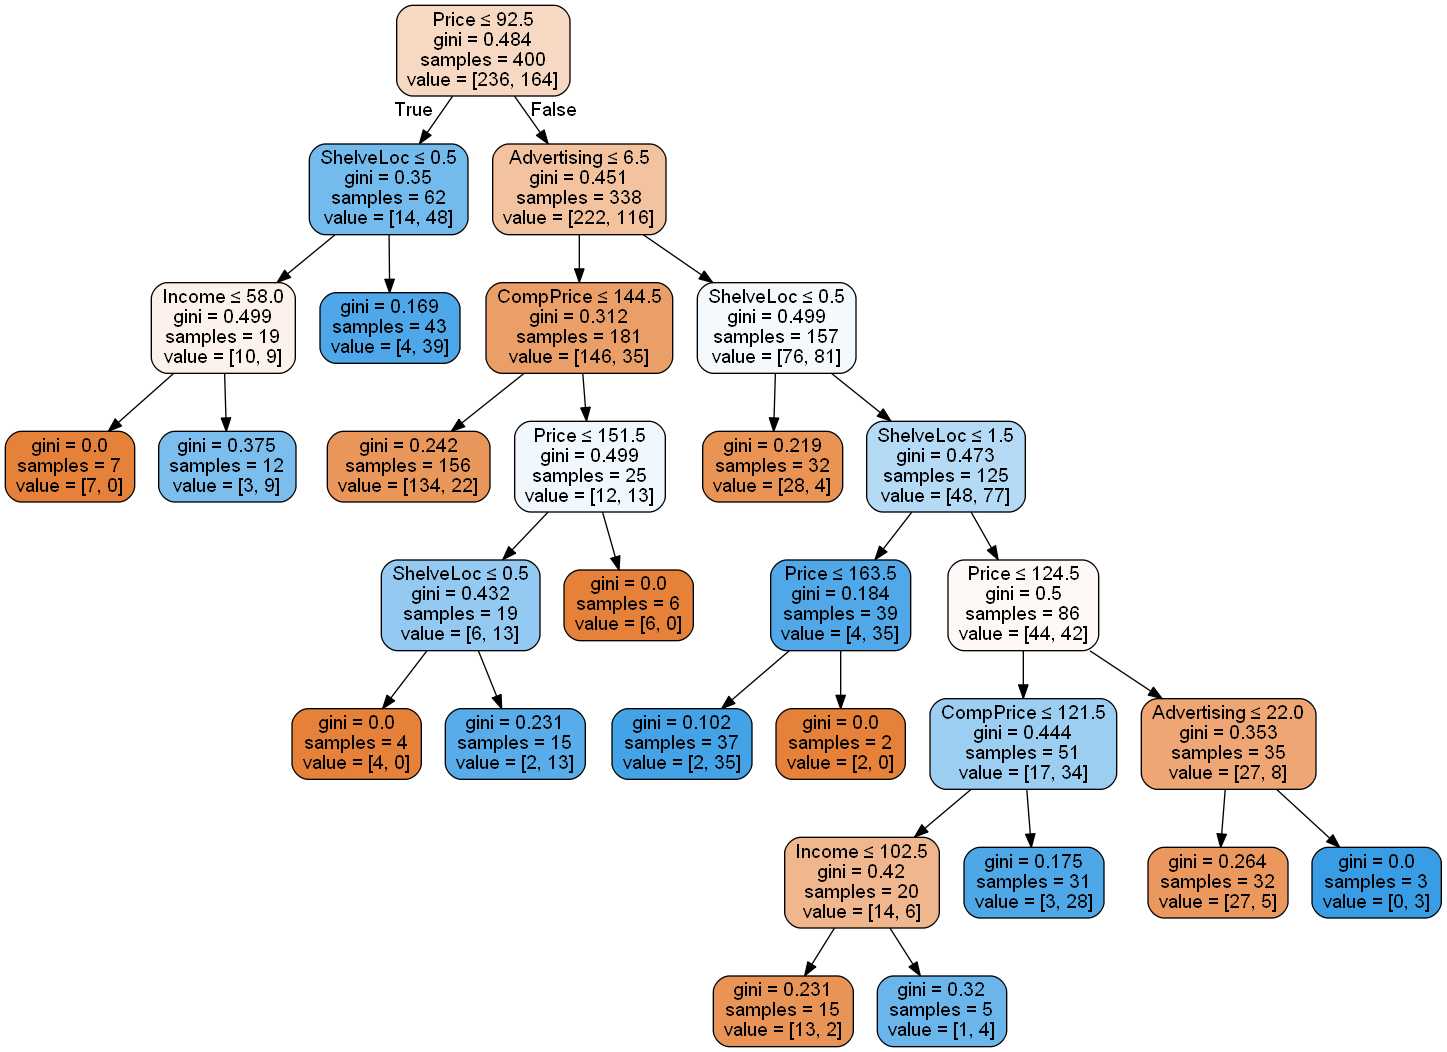

In [60]:
dot_data = StringIO()

export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X.columns)
# 아까처럼 컬럼 순서가 아니라 직접 컬럼 이름을 보기 위해서 feature_names를 사용

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Step 2
    * 이 데이터를 가지고 train/test 로 나누어보자

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.7833333333333333

## Step 3
    * 최적의 잎 갯수 찾기 : cv 이용해서

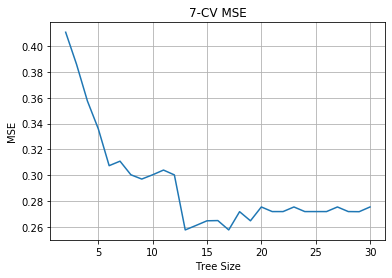

In [75]:
tree_sizes = range(2,31)
MSE_scores = []

for size in tree_sizes:
    clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=1234)
    MSE_s = 1-cross_val_score(clf_tree, X_train, y_train, cv=7, scoring='accuracy')
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=12)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.7916666666666666

In [87]:
# 위의 그림이 안 보이기 때문에....
feature_importance=pd.DataFrame({'feature':X.columns,
                                 'importance':clf_tree.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
5,ShelveLoc,0.272735
4,Price,0.270434
2,Advertising,0.196585
6,Age,0.127796
0,CompPrice,0.075505
1,Income,0.056945
3,Population,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


## Step 4
  - one hot encoding 사용

In [91]:
Carseats = pd.read_csv("C:/Users/1-11/Jupyter/scikit_learn_data/02_carseats/Carseats.csv")
del Carseats["Unnamed: 0"]
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [92]:
Carseats['High'] = Carseats["Sales"].apply(lambda x : 0 if x<=8 else 1)

# one-hot-encoding
Carseats_enc = pd.get_dummies(Carseats, drop_first=True)

X = Carseats_enc.drop(['Sales', 'High'], axis=1)
y = Carseats_enc["High"]

# 15개 잎으로 제한.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.7916666666666666

In [93]:
Carseats_enc.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,0,1,1
2,10.06,113,35,10,269,80,59,12,1,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1,0


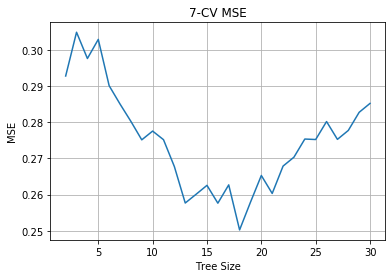

In [94]:
ree_sizes = range(2, 31)

MSE_scores = []
# 7 으로..7-fold
# 여기서는 원본에서 다시 자기가 알아서 cv해주는 것이니 이에서 한 train/test로 들어가는게 아님!!!
for size in tree_sizes:
    clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=1234)
    MSE_s = 1-cross_val_score(clf_tree, X, y, cv=7, scoring='accuracy')
    MSE_scores.append(np.mean(MSE_s))

# plot CV-MSE as tree size gets bigger 
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

In [95]:
# 18개 잎으로 제한.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=18)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

print (accuracy_score(y_test, y_pred))

0.775


# Ensemble Decision Tree

- Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [96]:
# 앞에서 사용한 one-hot-encoding  데이터 이용!!!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


# tree를 500개, split할 때 6개 feature 중에서 선택 
RF_clf = RandomForestClassifier(n_estimators=500, max_features=6, random_state=1234)

# Training set으로 RF regressor 학습 
RF_clf.fit(X_train, y_train)

# Test with Test Set
y_pred = RF_clf.predict(X_test)


print (accuracy_score(y_test, y_pred))

0.8916666666666667


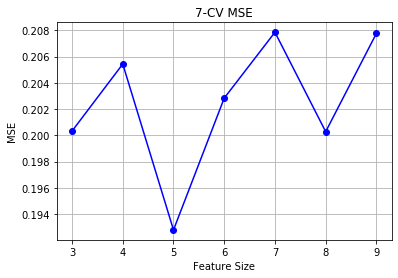

In [97]:
feature_sizes = range(3,10)
MSE_scores = []

for size in feature_sizes:
    RF_clf = RandomForestClassifier(n_estimators=500, max_features=size, random_state=1234)
    MSE_s = 1-cross_val_score(RF_clf, X, y, cv=7, scoring='accuracy', n_jobs=-1)
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger
plt.plot(feature_sizes, MSE_scores, 'bo-')
plt.title('7-CV MSE')
plt.xlabel('Feature Size')
plt.ylabel('MSE')
plt.grid(True)

In [98]:
# tree를 500개, split할 때 5개 feature 중에서 선택 
RF_cif = RandomForestClassifier(n_estimators=500, max_features=5, random_state=1234)

# Training set으로 RF regressor 학습 
RF_cif.fit(X_train, y_train)

# Test with Test Set
y_pred = RF_cif.predict(X_test)


print (accuracy_score(y_test, y_pred))

0.875


In [100]:
Importance=pd.DataFrame({'feature':X.columns, 'importance':RF_cif.feature_importances_}).sort_values(by='importance', ascending=False)
Importance

,feature,importance
4,Price,0.207843
5,Age,0.133307
2,Advertising,0.131635
0,CompPrice,0.122846
1,Income,0.108643
7,ShelveLoc_Good,0.102233
3,Population,0.076193
6,Education,0.054516
8,ShelveLoc_Medium,0.033893
10,US_Yes,0.015427


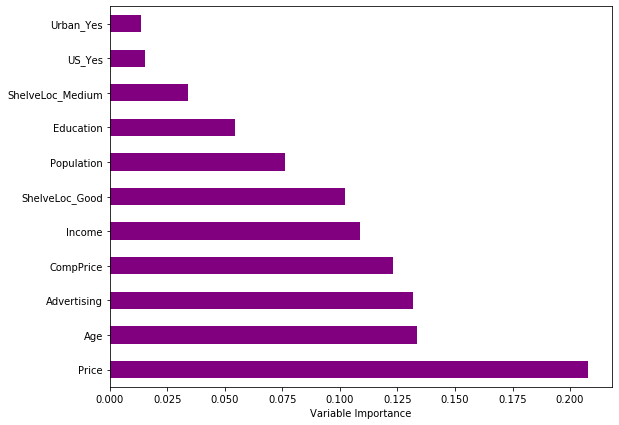

In [101]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,7)) 

Importance.plot(kind='barh', color='purple', ax=ax1)
y_pos = np.arange(len(Importance))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.yticks(y_pos, Importance.feature)
plt.show()